In [27]:
import os
print(os.getcwd())


e:\AI-Resume screener\notebooks


In [28]:
import joblib
import os

# make sure folder exists
os.makedirs("../src", exist_ok=True)

# save models safely
joblib.dump(model, "../src/model.pkl")
joblib.dump(tfidf, "../src/tfidf.pkl")
joblib.dump(label_encoder, "../src/label_encoder.pkl")

print("✅ All model files saved successfully!")


✅ All model files saved successfully!


In [26]:
import pandas as pd

resume_data=pd.read_csv(r"C:\Users\Aditya Jaiswal\Downloads\UpdatedResumeDataSet.csv\UpdatedResumeDataSet.csv")
print("resume Dataset Loaded")
print(resume_data.head())

job_data=pd.read_csv(r"C:\Users\Aditya Jaiswal\Downloads\job_title_des.csv\job_title_des.csv")
print("Job Dataset Loaded")

print(job_data.head())

resume Dataset Loaded
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
Job Dataset Loaded
   Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  
0  We are looking for hire experts flutter develo...  
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2  Data Scientist (Contractor)\n\nBangalore, IN\n...  
3  JOB DESCRIPTION:\n\nStrong framework outside o...  
4  job responsibility full stack engineer – rea

In [2]:
resume_data.columns
job_data.columns


Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')

In [3]:
resume_data.info()
job_data.info()
resume_data.isnull().sum()
job_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB


Unnamed: 0         0
Job Title          0
Job Description    0
dtype: int64

In [4]:
resume_data.shape

(962, 2)

In [5]:
resume_data.columns

Index(['Category', 'Resume'], dtype='object')

In [6]:
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
resume_data['Category'].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [8]:
import re

def clean_resume(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove urls
    text = re.sub('RT|cc', ' ', text)       # remove RT and cc
    text = re.sub('#\S+', '', text)         # remove hashtags
    text = re.sub('@\S+', '  ', text)       # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) # remove punctuations
    text = re.sub(r'[^\x00-\x7f]', ' ', text) # remove non-ascii
    text = re.sub('\s+', ' ', text)          # remove extra whitespace
    return text

resume_data['cleaned_resume'] = resume_data['Resume'].apply(lambda x: clean_resume(x))


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Aditya Jaiswal\AppData\Local\Temp\ipykernel_4908\2426861272.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('http\S+\s*', ' ', text)  # remove urls
C:\Users\Aditya Jaiswal\AppData\Local\Temp\ipykernel_4908\2426861272.py:6: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('#\S+', '', text)         # remove hashtags
C:\Users\Aditya Jaiswal\AppData\Local\Temp\ipykernel_4908\2426861272.py:7: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('@\S+', '

In [9]:
resume_data['cleaned_resume'][0][:500]


'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML '

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
label_encoder = LabelEncoder()
resume_data['category_encoded'] = label_encoder.fit_transform(resume_data['Category'])


In [13]:
list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

[('Advocate', 0),
 ('Arts', 1),
 ('Automation Testing', 2),
 ('Blockchain', 3),
 ('Business Analyst', 4),
 ('Civil Engineer', 5),
 ('Data Science', 6),
 ('Database', 7),
 ('DevOps Engineer', 8),
 ('DotNet Developer', 9),
 ('ETL Developer', 10),
 ('Electrical Engineering', 11),
 ('HR', 12),
 ('Hadoop', 13),
 ('Health and fitness', 14),
 ('Java Developer', 15),
 ('Mechanical Engineer', 16),
 ('Network Security Engineer', 17),
 ('Operations Manager', 18),
 ('PMO', 19),
 ('Python Developer', 20),
 ('SAP Developer', 21),
 ('Sales', 22),
 ('Testing', 23),
 ('Web Designing', 24)]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(
    resume_data['cleaned_resume'],
    resume_data['category_encoded'],
    test_size=0.2,
    random_state=42
)

In [16]:
resume_data.columns

Index(['Category', 'Resume', 'cleaned_resume', 'category_encoded'], dtype='object')

In [18]:
tfidf=TfidfVectorizer(stop_words='english',max_features=5000)
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [19]:
X_train_tfidf.shape, X_test_tfidf.shape


((769, 5000), (193, 5000))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=5000
)

# Fit & transform the training data, transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF transformation done!")
print(f"Train shape: {X_train_tfidf.shape}, Test shape: {X_test_tfidf.shape}")


TF-IDF transformation done!
Train shape: (769, 5000), Test shape: (193, 5000)


In [21]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=300)
model.fit(X_train_tfidf,y_train)

print("Model Training Completed")

Model Training Completed


Model Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00   

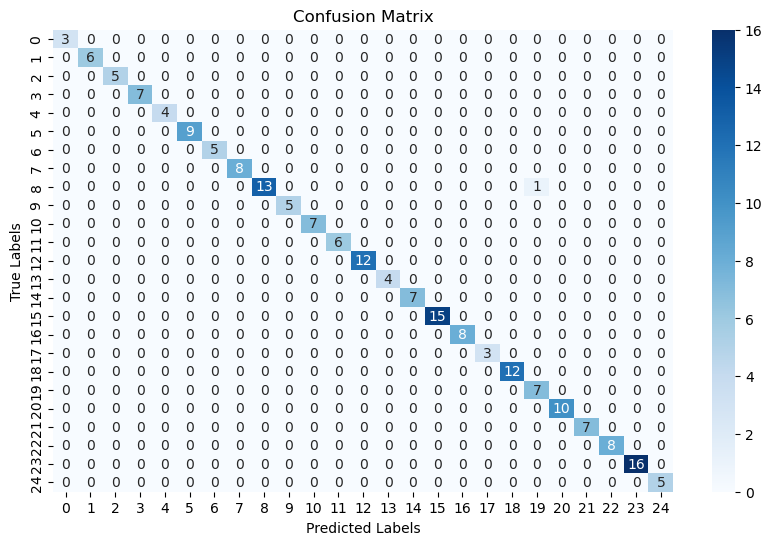

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [23]:
import joblib

joblib.dump(model, "resume_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [24]:
sample_resume = """
Experienced Data Scientist with hands-on experience in Python, Machine Learning, 
Data Analysis, and NLP. Proficient in libraries like pandas, scikit-learn, and TensorFlow. 
Worked on predictive modeling and data visualization projects.
"""
# Resume prediction\
sample_features = tfidf.transform([sample_resume])
predicted_category = model.predict(sample_features)[0]

print("Predicted Category:", label_encoder.inverse_transform([predicted_category])[0])


Predicted Category: Data Science


In [25]:
import joblib

joblib.dump(model, "src/model.pkl")
joblib.dump(tfidf, "src/tfidf.pkl")
joblib.dump(label_encoder, "src/label_encoder.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'src/model.pkl'

✅ Model Accuracy: 99.48 %

📊 Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
        

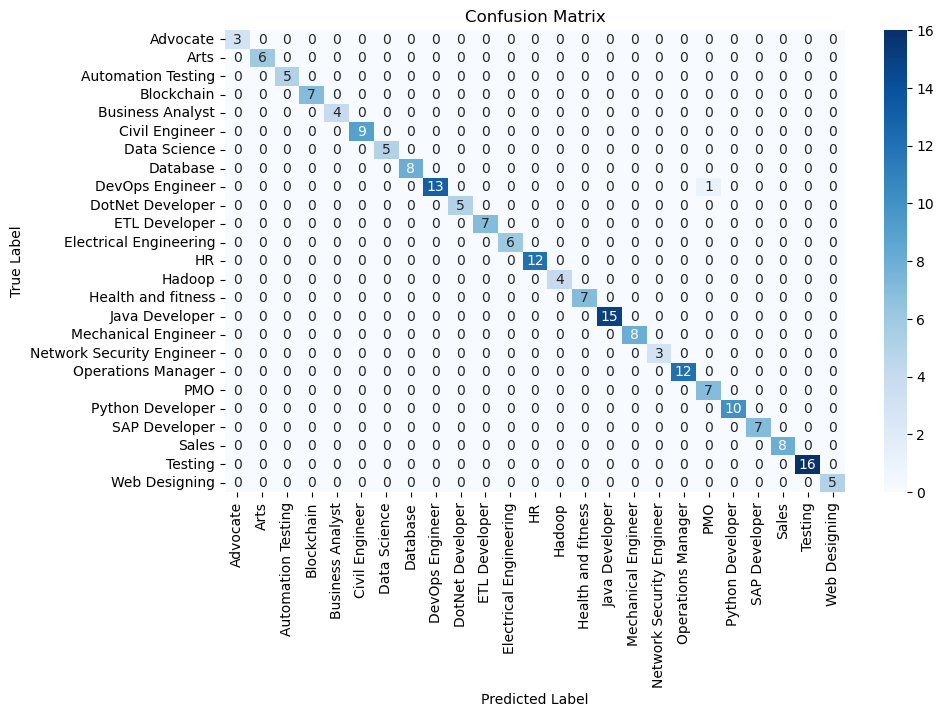

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Transform test data
X_test_tfidf = tfidf.transform(X_test)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(accuracy * 100, 2), "%")

# Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
